In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D2-Conrad/S4/Office_Conrad-S4.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:7920]
test_data = df.iloc[7920:]

In [5]:
len(train_data),len(test_data)

(7920, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (7896, 24, 1)
y_train.shape =  (7896,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24)                2496      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
62/62 [==============================] - 3s 13ms/step - loss: 69.8528
Epoch 2/300
62/62 [==============================] - 1s 18ms/step - loss: 34.3216
Epoch 3/300
62/62 [==============================] - 2s 24ms/step - loss: 12.9023
Epoch 4/300
62/62 [==============================] - 1s 24ms/step - loss: 5.9622
Epoch 5/300
62/62 [==============================] - 1s 21ms/step - loss: 4.7115
Epoch 6/300
62/62 [==============================] - 1s 21ms/step - loss: 3.9649
Epoch 7/300
62/62 [==============================] - 1s 23ms/step - loss: 3.1694
Epoch 8/300
62/62 [==============================] - 1s 22ms/step - loss: 2.4097
Epoch 9/300
62/62 [==============================] - 2s 27ms/step - loss: 1.9739
Epoch 10/300
62/62 [==============================] - 2s 28ms/step - loss: 1.7230
Epoch 11/300
62/62 [==============================] - 2s 28ms/step - loss: 1.5416
Epoch 12/300
62/62 [==============================] - 2s 29ms/step - loss: 1.3988
Epoch 13/300
62/62 [==

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for LSTM Model for training is:',mae_train)
print('Mean Absolute Error for LSTM Model for testing is:',mae_test)
print('MAPE for LSTM Model for training is:',mape_train)
print('MAPE for LSTM Model for testing is:',mape_test)

Root Mean Squared Error for LSTM Model for training is: 0.8843947447711269
Root Mean Squared Error for LSTM Model for testing is: 1.0167674578162433
Mean Absolute Error for LSTM Model for training is: 0.6484371882849107
Mean Absolute Error for LSTM Model for testing is: 0.7607113883191461
MAPE for LSTM Model for training is: 0.07142898667996588
MAPE for LSTM Model for testing is: 0.09328511923654755


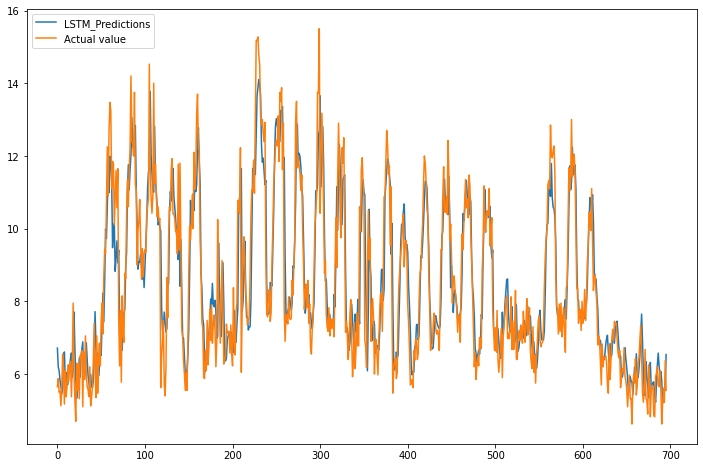

In [19]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [20]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([5.6500001]), array([6.7144995], dtype=float32))

In [21]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-1.06449938]), array([-0.32191086]), array([-0.5895586]), array([-0.29864168]), array([-0.55583191]), array([0.15326548]), array([0.91989756]), array([-0.44831944]), array([-1.43201828]), array([0.2482338]), array([-0.66995144]), array([-0.041327]), array([0.53496075]), array([-0.44103432]), array([0.03653193]), array([-0.09155893]), array([-1.20493603]), array([0.32274342]), array([1.84783745]), array([-1.65763569]), array([-1.41281748]), array([-1.1857729]), array([0.96545887]), array([-0.17434216]), array([0.47623014]), array([-1.11102581]), array([0.58707047]), array([-0.11644173]), array([-0.04871225]), array([-1.78471613]), array([0.71022749]), array([-0.39674902]), array([1.01327324]), array([-0.88737631]), array([-0.7599864]), array([-0.39681721]), array([-0.37674999]), array([0.64988852]), array([-0.86832523]), array([-0.33086157]), array([0.02283621]), array([0.55086565]), array([0.97985887]), array([-1.5415926]), array([-1.44983911]), array([1.06472111]), array([-1.1

In [22]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([3.38438225]), array([-5.59594631]))

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(369, 327)